# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset insurance.csv
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
#To check null value in dataset
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [5]:
#select X(input features) and Y(target) from dataset df
X=df.drop("insuranceclaim",axis=1)
Y=df["insuranceclaim"]

In [6]:
#Train_Test_Split : 70% and 30%
from sklearn.model_selection import train_test_split

In [7]:
#Split our dataset in train test of 70% & 30%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [8]:
from sklearn.metrics import classification_report

In [9]:
def create_model(model):   #user defined function
    model.fit(X_train,Y_train)  #model train
    y_pred=model.predict(X_test)
    print(classification_report(Y_test,y_pred))
    return model

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
#Create the object of DecisionTreeClassifier
dt1=DecisionTreeClassifier()

In [12]:
#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



In [ ]:
#Output is very good means great this is perfect model
'''
Decision Tree can automatic select the best features (columns). for features
selection purpose , Decision Tree are always used
'''

In [13]:
#Lets checkout what are the imporatant features
#that are selected by decision tree
dt1.feature_importances_
#feature_importances_inbuilt command of decisiontree classifier

array([0.0633924 , 0.        , 0.4259328 , 0.32951284, 0.16581384,
       0.        , 0.01534812])

In [14]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
'''Highest Information Gain : 1) bmi then 2. children 3. smoker'''
'''
bmi has the highest information gain
children little less than bmi
smoker little less than children and bmi
most imporatant input features means columns bmi , children , smoker
which predict the target
'''

In [15]:
from sklearn import tree

In [16]:
features=X.columns

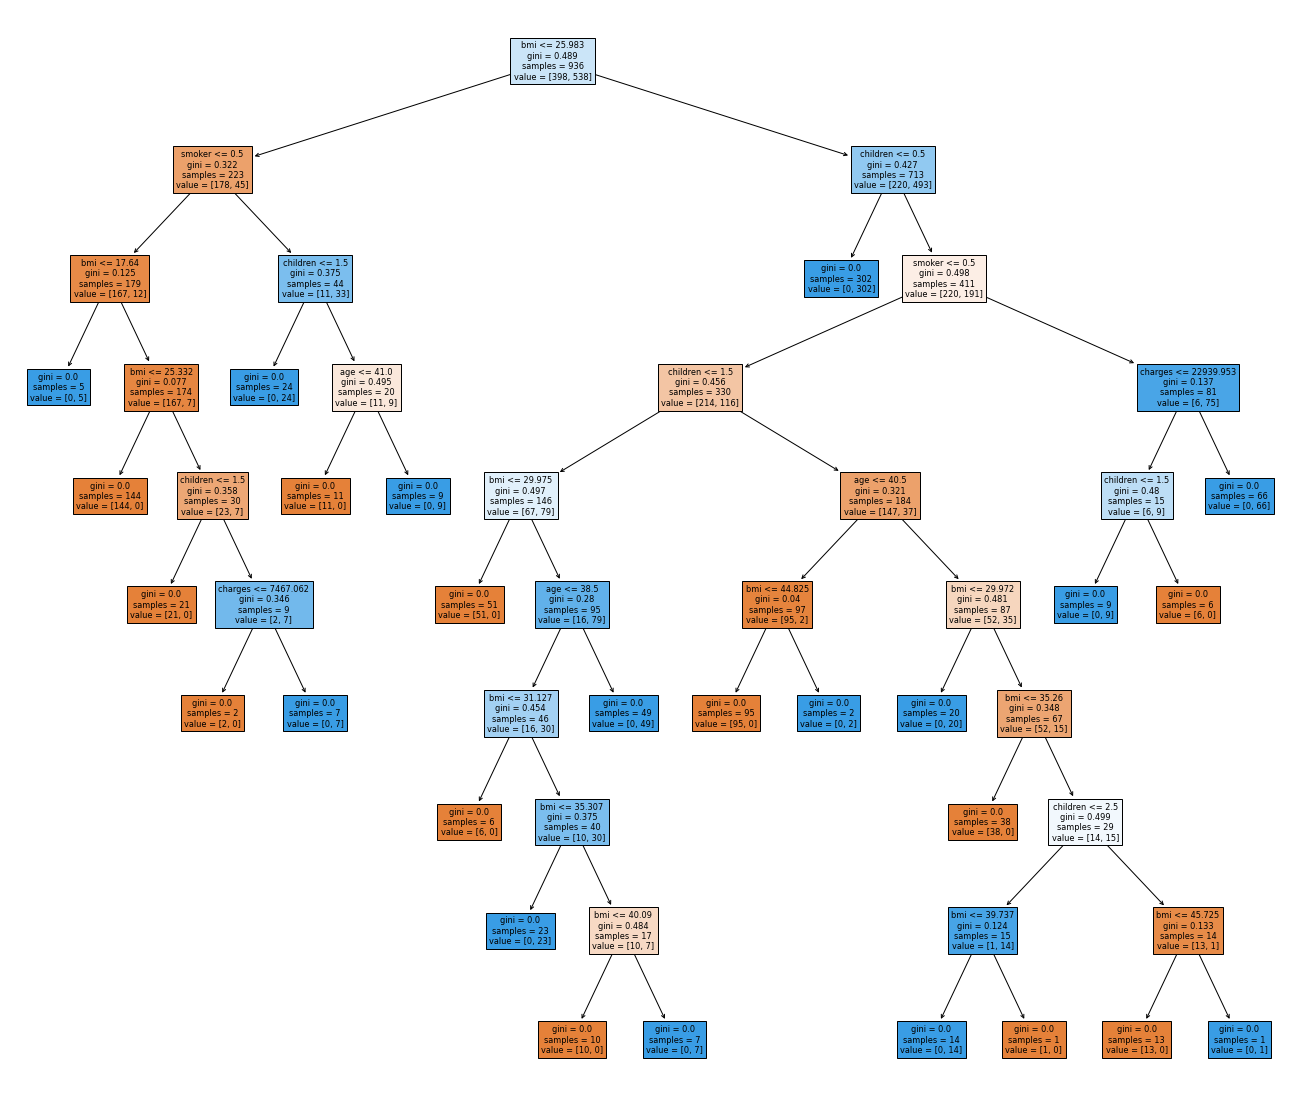

In [17]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)